# DSCS_Winter23_HW2

## Preprocessing

In [217]:
#import basic libraries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
#read csv
train_df = pd.read_csv(Path.cwd()/'train_kaggle.csv'/'train_kaggle.csv')
test_df = pd.read_csv(Path.cwd()/'test_kaggle.csv')
train_df

,Store_id,SKU_id,Date,Promo,Demand,Regular_Price,Promo_Price
0,1,1,01.01.2015,NaN,22,163.78,NaN
1,1,1,02.01.2015,NaN,41,163.78,NaN
2,1,1,03.01.2015,NaN,35,163.78,NaN
3,1,1,04.01.2015,NaN,72,163.78,NaN
4,1,1,05.01.2015,NaN,25,163.78,NaN
...,...,...,...,...,...,...,...
86911,106,2,18.05.2016,NaN,9,138.50,NaN
86912,106,2,19.05.2016,NaN,3,138.50,NaN
86913,106,2,20.05.2016,NaN,13,138.50,NaN
86914,106,2,21.05.2016,NaN,3,138.50,NaN


In [219]:
test_df


,id,Store_id,SKU_id,Date,Promo,Demand,Regular_Price,Promo_Price
0,0,1,1,23.05.2016,1.0,NaN,128.98,119.6
1,1,1,1,24.05.2016,NaN,NaN,128.98,NaN
2,2,1,1,25.05.2016,NaN,NaN,131.70,NaN
3,3,1,1,26.05.2016,NaN,NaN,131.70,NaN
4,4,1,1,27.05.2016,NaN,NaN,131.70,NaN
...,...,...,...,...,...,...,...,...
5965,5965,110,2,15.06.2016,NaN,NaN,133.06,NaN
5966,5966,110,2,16.06.2016,NaN,NaN,133.06,NaN
5967,5967,110,2,17.06.2016,NaN,NaN,133.06,NaN
5968,5968,110,2,18.06.2016,NaN,NaN,133.06,NaN


In [220]:
# c wussup
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_id,86916.0,44.034735,25.913644,1.00,22.00,43.0,65.00,106.00
SKU_id,86916.0,1.496836,0.499993,1.00,1.00,1.0,2.00,2.00
Promo,15349.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.00
Demand,86916.0,193.088695,366.859645,0.00,3.00,72.0,226.00,9686.00
Regular_Price,86916.0,139.212821,9.180827,121.64,131.70,138.5,142.57,176.82
Promo_Price,15349.0,120.078875,9.961642,100.30,116.61,119.6,127.49,143.80


In [221]:
# c wasup 2 
def col_data(df):
    t = []
    for col in df.columns:
        k_unique = df[col].nunique()
        k_nan = df[col].isna().sum()
        k_zeros = (df[col] == 0).sum()
        
        t.append([col, k_unique, k_nan, k_zeros])

    col_info = pd.DataFrame(t, columns=['columns', 'unique', 'NaN', 'zeros'])
    return col_info
col_data(train_df)

,columns,unique,NaN,zeros
0,Store_id,103,0,0
1,SKU_id,2,0,0
2,Date,508,0,0
3,Promo,1,71567,0
4,Demand,993,0,20614
5,Regular_Price,70,0,0
6,Promo_Price,19,71567,0


(0.0, 1000.0)

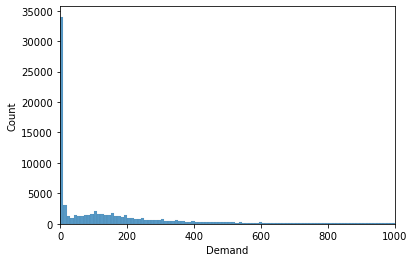

In [222]:
sns.histplot(train_df.Demand, thresh=1000)
plt.xlim(0, 1000)

### Promo and Promo_Price transformation

In [223]:
#value counts for Promo and Promo_Price
train_df.Promo.value_counts(dropna=False), train_df.Promo_Price.value_counts(dropna=False)

(NaN    71567
 1.0    15349
 Name: Promo, dtype: int64,
 NaN       71567
 119.33     2217
 124.77     1667
 103.02     1325
 122.32     1008
 130.21      944
 116.61      914
 122.05      867
 130.75      855
 135.64      812
 132.92      751
 106.01      721
 116.89      690
 108.46      665
 119.60      618
 100.30      588
 127.49      518
 138.36       74
 143.80       73
 114.17       42
 Name: Promo_Price, dtype: int64)

Notice that Promo column describes whether an item is on sale, and takes values of either 1 or NaN, we can map NaN values to 0's to enable us to use it as a feature. The same applies to Promo_Price, however, I suggest, it would be better to map NaN values to their corresponding Regular_price, because it allows us to use this column and it doesn't break the column logic as we consider that in case when there is no Promo the discount would be 0%, thus Promo and Regular prices coincide.  

In [224]:
#mapping values
train_df.Promo_Price = train_df.Promo_Price.fillna(train_df.Regular_Price)
test_df.Promo_Price = test_df.Promo_Price.fillna(test_df.Regular_Price)

train_df.Promo = train_df.Regular_Price - train_df.Promo_Price
test_df.Promo = test_df.Regular_Price - test_df.Promo_Price

train_df['Promo_Percent'] = (train_df.Regular_Price - train_df.Promo_Price)/train_df.Regular_Price
test_df['Promo_Percent'] = (test_df.Regular_Price - test_df.Promo_Price)/test_df.Regular_Price


train_df

,Store_id,SKU_id,Date,Promo,Demand,Regular_Price,Promo_Price,Promo_Percent
0,1,1,01.01.2015,0.0,22,163.78,163.78,0.0
1,1,1,02.01.2015,0.0,41,163.78,163.78,0.0
2,1,1,03.01.2015,0.0,35,163.78,163.78,0.0
3,1,1,04.01.2015,0.0,72,163.78,163.78,0.0
4,1,1,05.01.2015,0.0,25,163.78,163.78,0.0
...,...,...,...,...,...,...,...,...
86911,106,2,18.05.2016,0.0,9,138.50,138.50,0.0
86912,106,2,19.05.2016,0.0,3,138.50,138.50,0.0
86913,106,2,20.05.2016,0.0,13,138.50,138.50,0.0
86914,106,2,21.05.2016,0.0,3,138.50,138.50,0.0


In [225]:
train_df.loc[train_df['Promo'] != 0]

,Store_id,SKU_id,Date,Promo,Demand,Regular_Price,Promo_Price,Promo_Percent
47,1,1,17.02.2015,5.57,371,149.37,143.80,0.037290
48,1,1,18.02.2015,13.73,509,149.37,135.64,0.091919
49,1,1,19.02.2015,13.73,851,149.37,135.64,0.091919
50,1,1,20.02.2015,13.73,914,149.37,135.64,0.091919
51,1,1,21.02.2015,13.73,606,149.37,135.64,0.091919
...,...,...,...,...,...,...,...,...
86898,106,2,05.05.2016,32.49,57,138.50,106.01,0.234585
86899,106,2,06.05.2016,32.49,66,138.50,106.01,0.234585
86900,106,2,07.05.2016,32.49,82,138.50,106.01,0.234585
86901,106,2,08.05.2016,32.49,79,138.50,106.01,0.234585


In [226]:
#value counts for Promo and Promo_Price after 
train_df.Promo.value_counts(dropna=False), train_df.Promo_Price.value_counts(dropna=False)

(0.00     71567
 13.73     1593
 39.55     1325
 12.37     1085
 11.00      872
 11.01      855
 8.29       833
 32.49      721
 21.61      690
 13.46      690
 9.38       618
 21.34      609
 27.87      588
 29.90      570
 5.30       560
 11.01      546
 14.00      530
 13.18      422
 5.57       400
 13.73      354
 2.86       240
 8.02       213
 21.88      184
 5.57       121
 34.11       95
 18.89       90
 40.91       74
 10.90       72
 9.65        56
 20.25       52
 24.33       42
 21.34       36
 8.56        33
 4.21        28
 17.53       24
 9.92        24
 18.35       18
 18.79       15
 6.93        12
 16.71       12
 16.44        8
 15.63        6
 12.91        6
 13.18        6
 24.60        4
 12.64        3
 5.84         3
 9.92         3
 0.40         3
 10.19        3
 0.13         2
 Name: Promo, dtype: int64,
 138.50    6466
 150.73    5591
 138.36    5529
 135.78    4710
 130.34    4478
           ... 
 134.15       6
 134.55       1
 162.58       1
 154.67     

As you can see above, the above described transformations have been applied succesfully and we can now use these two columns as features.

### Date transformation discussion

Now, se whould look at the Date column and possibly convert it into a usable feature. A possible solution may be to ordinally encode it so that each distinct date would represent a number of day since the earlier day, so that Date would be ordinal feature. As we have price data, it is very sensible to complete this transformation to account for the effect of inflation on the prices. However, before start we need to sure that we will actually interpolate the results, beacause if the date regions of train and test data do not interesect in some way,it would be incorrect to extrapolate from the train data to test data.

In [227]:
from datetime import datetime

def to_days_from_start(s):
    t = s.map(lambda x: datetime.strptime(x, '%d.%m.%Y'))
    t_min = t.min()
    t = t.map(lambda x: (x - t_min).days)
    return t



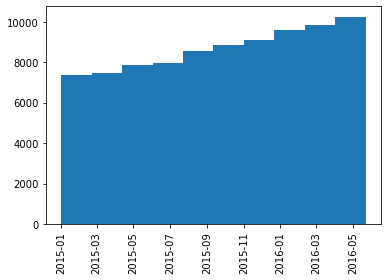

In [228]:
plt.hist(train_df.Date.map(lambda x: datetime.strptime(x, '%d.%m.%Y')))
plt.xticks(rotation=90)
plt.show()

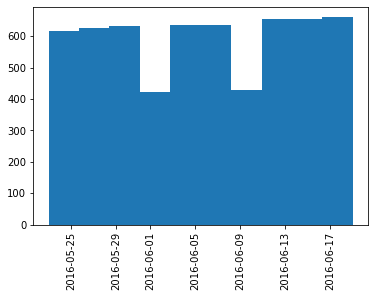

In [229]:
plt.hist(test_df.Date.map(lambda x: datetime.strptime(x, '%d.%m.%Y')))
plt.xticks(rotation=90)
plt.show()

The dates do not intersect, therefore, we would have to extrapolate, so perhaps, it is better to leave Date column out.

<AxesSubplot:>

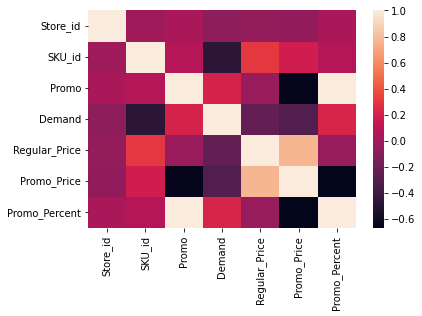

In [230]:
sns.heatmap(train_df.corr())

We can possibly drop Regular_Price as it now highly correlates with Promo_price and basically serves no purpose since all of the prices are represented in Promo_Price and Promo is a dummy for whether a product is on sale.

In [231]:
train_df = train_df.drop(columns=['Regular_Price'])
test_df = test_df.drop(columns=['Regular_Price'])
train_df

,Store_id,SKU_id,Date,Promo,Demand,Promo_Price,Promo_Percent
0,1,1,01.01.2015,0.0,22,163.78,0.0
1,1,1,02.01.2015,0.0,41,163.78,0.0
2,1,1,03.01.2015,0.0,35,163.78,0.0
3,1,1,04.01.2015,0.0,72,163.78,0.0
4,1,1,05.01.2015,0.0,25,163.78,0.0
...,...,...,...,...,...,...,...
86911,106,2,18.05.2016,0.0,9,138.50,0.0
86912,106,2,19.05.2016,0.0,3,138.50,0.0
86913,106,2,20.05.2016,0.0,13,138.50,0.0
86914,106,2,21.05.2016,0.0,3,138.50,0.0


In [232]:
test_df

,id,Store_id,SKU_id,Date,Promo,Demand,Promo_Price,Promo_Percent
0,0,1,1,23.05.2016,9.38,NaN,119.60,0.072724
1,1,1,1,24.05.2016,0.00,NaN,128.98,0.000000
2,2,1,1,25.05.2016,0.00,NaN,131.70,0.000000
3,3,1,1,26.05.2016,0.00,NaN,131.70,0.000000
4,4,1,1,27.05.2016,0.00,NaN,131.70,0.000000
...,...,...,...,...,...,...,...,...
5965,5965,110,2,15.06.2016,0.00,NaN,133.06,0.000000
5966,5966,110,2,16.06.2016,0.00,NaN,133.06,0.000000
5967,5967,110,2,17.06.2016,0.00,NaN,133.06,0.000000
5968,5968,110,2,18.06.2016,0.00,NaN,133.06,0.000000


## Model Selection

In [233]:
from sklearn.model_selection import train_test_split

X = train_df[['Store_id', 'SKU_id', 'Promo', 'Promo_Price', 'Promo_Percent']]
y = train_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [234]:
from sklearn.metrics import mean_absolute_error as mae

### Regression

In [235]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

In [236]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(3)), 
    ('regr', LinearRegression())
])
cv = KFold(n_splits=5, random_state=0, shuffle=True)

cross_val_score(pipe, X, y, cv=cv, scoring='neg_mean_absolute_error')

array([-103.49444337, -107.58665532, -106.33831606, -107.49909043,
       -106.47359062])

Poor performance, does not go below 100

### Gradient Boosting

In [237]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [238]:
m = GradientBoostingRegressor(random_state=0, loss='absolute_error', subsample=0.4)

params = {
    'learning_rate': [0.1, 0.2, 0.5, 1],
    'n_estimators' : [50, 100, 150, 200, 300],
}

gs = GridSearchCV(m, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
gs.fit(X, y)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(loss='absolute_error',
                                                 random_state=0,
                                                 subsample=0.4),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_absolute_error')

In [239]:
gs.best_score_

-102.20837732209625

In [240]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [241]:
gbr = GradientBoostingRegressor(random_state=0, loss='absolute_error', learning_rate=0.1, n_estimators=500)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

cross_val_score(gbr, X, y, cv=cv, scoring='neg_mean_absolute_error')

array([-93.10823606, -98.86580558, -96.85707665, -97.65321386,
       -96.79645491])

In [242]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mae(y_test, y_pred)

93.10823605748688

Solid performance, breaks below 100

### Histogram Gradient boosting (submitted)

In [243]:
m = HistGradientBoostingRegressor(random_state=0, loss='absolute_error')

params = {
    'learning_rate': [0.1, 0.2, 0.5, 1],
    'max_iter' : [50, 100, 150, 200, 300],
}

gs = GridSearchCV(m, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
gs.fit(X, y)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingRegressor(loss='absolute_error',
                                                     random_state=0),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_iter': [50, 100, 150, 200, 300]},
             scoring='neg_mean_absolute_error')

In [244]:
gs.best_params_

{'learning_rate': 0.2, 'max_iter': 150}

In [245]:
gs.best_score_

-99.55849596382795

In [269]:
hgbr = HistGradientBoostingRegressor(random_state=0, loss='absolute_error', learning_rate=0.2, max_iter=150)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

cross_val_score(hgbr, X, y, cv=cv, scoring='neg_mean_absolute_error')

array([-78.64936877, -84.18890995, -81.28708909, -82.49375952,
       -83.12378978])

Because of a large amount of observations shows performance improvement on regular Gradient Boosting. Best submission model.

### Random Forest 

In [247]:
from sklearn.ensemble import RandomForestRegressor

In [248]:
m = RandomForestRegressor(random_state=0)
params = {
    'max_depth': [5, 10, 25, 50],
    'n_estimators' : [50, 100, 150, 200, 300],
}

In [249]:
gs = GridSearchCV(m, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 25, 50],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_absolute_error')

In [250]:
gs.best_score_

-102.77602807580611

In [251]:
gs.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [252]:
m = RandomForestRegressor(random_state=0, max_depth=10, n_estimators=50)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
mae(y_test, y_pred)

82.88385015562491

Good performance, yet, does not improve upon HGBR

### Decision Tree Regressor

In [253]:
!pip install xgboost

In [254]:
from xgboost import XGBRegressor

In [272]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mae(y_test, y_pred)

71.73455972066671

In [273]:
params = {
    'max_depth': [5, 10, 25, 50],
    'n_estimators' : [50, 100, 150, 200, 300],
}

gs = GridSearchCV(xgb, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
gs.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [274]:
gs.best_score_

-105.37124122548047

In [275]:
gs.best_params_

{'max_depth': 50, 'n_estimators': 50}

Even though expected better performance than other gradient boosting methods, showed underwhelming results.

### Catboost

In [258]:
!pip install catboost

In [259]:
from catboost import CatBoost, CatBoostRegressor, Pool

In [260]:
cat_train = Pool(train_df.drop(columns=['Demand']), y, cat_features=['Date'])
cat_test = Pool(test_df.drop(columns=['Demand']), test_df['Demand'], cat_features=['Date'])

In [261]:
cb = CatBoostRegressor()
params = {
    'iterations': [100, 250, 500],
    'learning_rate': [0.03, 0.1, 0.2, 0.5],
    'max_depth': [10, 12, 14, 15],
}

gs_cb = cb.grid_search(params, X=X, y=y, train_size=0.8)

0:	learn: 405.0359244	test: 414.7786786	best: 414.7786786 (0)	total: 16.1ms	remaining: 1.59s
1:	learn: 397.5687654	test: 407.2592394	best: 407.2592394 (1)	total: 31.7ms	remaining: 1.55s
2:	learn: 390.4952226	test: 400.1414942	best: 400.1414942 (2)	total: 39.6ms	remaining: 1.28s
3:	learn: 383.4470574	test: 393.0856163	best: 393.0856163 (3)	total: 51.3ms	remaining: 1.23s
4:	learn: 377.0450624	test: 386.6401707	best: 386.6401707 (4)	total: 60.6ms	remaining: 1.15s
5:	learn: 370.7351949	test: 380.3660380	best: 380.3660380 (5)	total: 72.2ms	remaining: 1.13s
6:	learn: 364.8349059	test: 374.4550090	best: 374.4550090 (6)	total: 77.9ms	remaining: 1.03s
7:	learn: 358.9256063	test: 368.5610926	best: 368.5610926 (7)	total: 91.2ms	remaining: 1.05s
8:	learn: 353.5118868	test: 363.1303542	best: 363.1303542 (8)	total: 99.3ms	remaining: 1s
9:	learn: 348.2676321	test: 357.8649268	best: 357.8649268 (9)	total: 108ms	remaining: 975ms
10:	learn: 343.3182610	test: 352.9049067	best: 352.9049067 (10)	total: 113

In [262]:
gs_cb

{'params': {'depth': 10, 'iterations': 500, 'learning_rate': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

In [266]:
cat_X = train_df[['Store_id', 'SKU_id', 'Date', 'Promo', 'Promo_Price', 'Promo_Percent']]
cat_y = train_df['Demand']

cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(cat_X, cat_y, train_size=0.8, random_state=0)

cb = CatBoostRegressor(max_depth=10, iterations=500, learning_rate=0.2, random_state=0) 
cb.fit(Pool(cat_X_train, cat_y_train, cat_features=['Date']))
y_pred = cb.predict(Pool(cat_X_test, cat_y_test, cat_features=['Date']))
mae(y_test, y_pred)

0:	learn: 335.0596056	total: 47.2ms	remaining: 23.6s
1:	learn: 308.2194476	total: 115ms	remaining: 28.8s
2:	learn: 288.2920702	total: 181ms	remaining: 29.9s
3:	learn: 274.1375636	total: 222ms	remaining: 27.6s
4:	learn: 263.7314961	total: 256ms	remaining: 25.3s
5:	learn: 255.9506553	total: 340ms	remaining: 28s
6:	learn: 250.1058673	total: 476ms	remaining: 33.5s
7:	learn: 246.2408691	total: 523ms	remaining: 32.1s
8:	learn: 243.8901519	total: 564ms	remaining: 30.8s
9:	learn: 241.4093164	total: 605ms	remaining: 29.6s
10:	learn: 238.5413038	total: 664ms	remaining: 29.5s
11:	learn: 236.1358812	total: 723ms	remaining: 29.4s
12:	learn: 233.8063201	total: 762ms	remaining: 28.6s
13:	learn: 232.4193945	total: 789ms	remaining: 27.4s
14:	learn: 230.6131422	total: 809ms	remaining: 26.2s
15:	learn: 228.8362327	total: 836ms	remaining: 25.3s
16:	learn: 227.6472516	total: 861ms	remaining: 24.5s
17:	learn: 226.1845446	total: 890ms	remaining: 23.8s
18:	learn: 225.3678472	total: 917ms	remaining: 23.2s
19:	

65.7172563603474

Shows incredible performance on training data, fails to deliver on unseen data.

### Submisson

Histogram Gradient Boosting Regressor showed the best result, scoring 76 on kaggle on the public leaderboard

In [276]:
X_subm = test_df[['Store_id', 'SKU_id', 'Promo', 'Promo_Price', 'Promo_Percent']]
hgbr.fit(X, y)
y_subm = hgbr.predict(X_subm).round()
subm = pd.DataFrame(y_subm, columns=['Demand'])
subm.to_csv(Path.cwd()/'submission.csv')